# Customer Churn Prediction in the Telecommunications Industry

![Cover Image](file:///C/Users/Eston/Project_Phase3/coverimage.png)


##    Business Understanding

The telecommunications industry is highly competitive, and customer retention is crucial for the success and profitability of telecom companies. Customer churn, or when customers switch to competitors or discontinue their services, can result in significant financial losses. It is important for telecom companies to identify and understand the factors that contribute to customer churn in order to implement effective retention strategies.

SyriaTel, as a telecommunications company, is interested in reducing the financial impact of customer churn. By predicting customer churn in advance, SyriaTel can proactively intervene and implement targeted retention efforts to retain customers who are at high risk of leaving. This project aims to develop a classifier using machine learning techniques to predict whether a customer will "soon" stop doing business with SyriaTel.

## Objectives

* Understanding the relationship between the customer churn and other variables
* To understand what variables have a huge influence on customer decision to churn
* Develop a machine learning model that can classify customers as either likely to churn or likely to continue using SyriaTel's services.

## Data Understanding

We begin by importing the required libraries for data analysis, visualization, and model building

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


Loading the dataset into a DataFrame(df) using the pandas library. The dataset is stored in a CSV file named 'bigml_59c28831336c6604c800002a.csv'.

In [83]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [84]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [85]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [86]:
# provide a summary of the statistical measures for each numerical column in the DataFrame 
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [87]:
# provide the dimensions of the dataframe
df.shape

(3333, 21)

***Data Description***

1. state: The state where the customer is located (categorical)
2. account length: The duration of the customer's account with SyriaTel in months (numeric)
3. area code: The area code of the customer's phone number (numeric)
4. phone number: The customer's phone number (string)
5. international plan: Indicates whether the customer has an international calling plan (categorical: 'yes' or 'no')
6. voice mail plan: Indicates whether the customer has a voice mail plan (categorical: 'yes' or 'no')
7. number vmail messages: The number of voice mail messages the customer has received (numeric)
8. total day minutes: The total number of minutes the customer has used during the day (numeric)
9. total day calls: The total number of calls made by the customer during the day (numeric)
10. total day charge: The total charge for daytime usage (numeric)
11. total eve minutes: The total number of minutes the customer has used during the evening (numeric)
12. total eve calls: The total number of calls made by the customer during the evening (numeric)
13. total eve charge: The total charge for evening usage (numeric)
14. total night minutes: The total number of minutes the customer has used during the night (numeric)
15. total night calls: The total number of calls made by the customer during the night (numeric)
16. total night charge: The total charge for nighttime usage (numeric)
17. total intl minutes: The total number of international minutes used by the customer (numeric)
18. total intl calls: The total number of international calls made by the customer (numeric)
19. total intl charge: The total charge for international usage (numeric)
20. customer service calls: The number of customer service calls made by the customer (numeric)
21. churn: Indicates whether the customer has churned or not (target variable: boolean)

## Data Exploration

***Check for missing values***

In [88]:
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


***Check for repeated data***

In [89]:
# to check if there are any repeated data. am using phone number as the unique variable
column_name = 'phone number'
repeated_values = df[df.duplicated(subset=column_name, keep=False)][column_name].unique()
print(repeated_values)

[]


***Categorical columns***

In [90]:
categorical_vars = df.select_dtypes(include=['object', 'category'])
categorical_columns = categorical_vars.columns.tolist()
print("categorical columns are:" ,categorical_columns)


categorical columns are: ['state', 'phone number', 'international plan', 'voice mail plan']


***Numerical columns***

In [91]:
numerical_vars = df.select_dtypes(include=['int64', 'float'])
numerical_columns = numerical_vars.columns.tolist()
print("numerical columns are:" ,numerical_columns)


numerical columns are: ['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


## Feature Engineering

***Creating new columns and dropping others***

In [92]:
# Create the 'total minutes' column
df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

# Create the 'total calls' column
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']

# Create the 'total charge' column
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

# updated dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,False,707.2,300,72.86
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,False,611.5,329,55.54
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,False,527.2,328,59.00
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,False,558.2,248,65.02
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,False,501.9,356,49.36


In [93]:
# Drop the individual columns used to create summed columns
df.drop(['total day minutes', 'total eve minutes', 'total night minutes'], axis=1, inplace=True)
df.drop(['total day calls', 'total eve calls', 'total night calls'], axis=1, inplace=True)
df.drop(['total day charge', 'total eve charge', 'total night charge'], axis=1, inplace=True)

# updated dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,KS,128,415,382-4657,no,yes,25,10.0,3,2.70,1,False,707.2,300,72.86
1,OH,107,415,371-7191,no,yes,26,13.7,3,3.70,1,False,611.5,329,55.54
2,NJ,137,415,358-1921,no,no,0,12.2,5,3.29,0,False,527.2,328,59.00
3,OH,84,408,375-9999,yes,no,0,6.6,7,1.78,2,False,558.2,248,65.02
4,OK,75,415,330-6626,yes,no,0,10.1,3,2.73,3,False,501.9,356,49.36


***Converting area code column to a categorical variable***

In [94]:
df['area code'] = df['area code'].astype(str)

## Exploratory Data Analysis

***Distribution of churn variable***

In [95]:
# examine the distribution of the target variable "churn" and calculate the percentage of churned customers
churn_distribution = df['churn'].value_counts()
churn_rate = churn_distribution[1] / churn_distribution.sum() * 100

print("Churn Distribution:")
print(churn_distribution)
print("\nChurn Rate: {:.2f}%".format(churn_rate))

Churn Distribution:
False    2850
True      483
Name: churn, dtype: int64

Churn Rate: 14.49%


There is a significant class imbalance between customers who did not churn (2850) and customers who did churn (483).
The churn rate(14.49%) provides insight into the overall churn behavior of customers in the dataset.

***Distribution of all the numeric variables***

plotting histograms to visualize the distribution of numerical variables in the dataset.

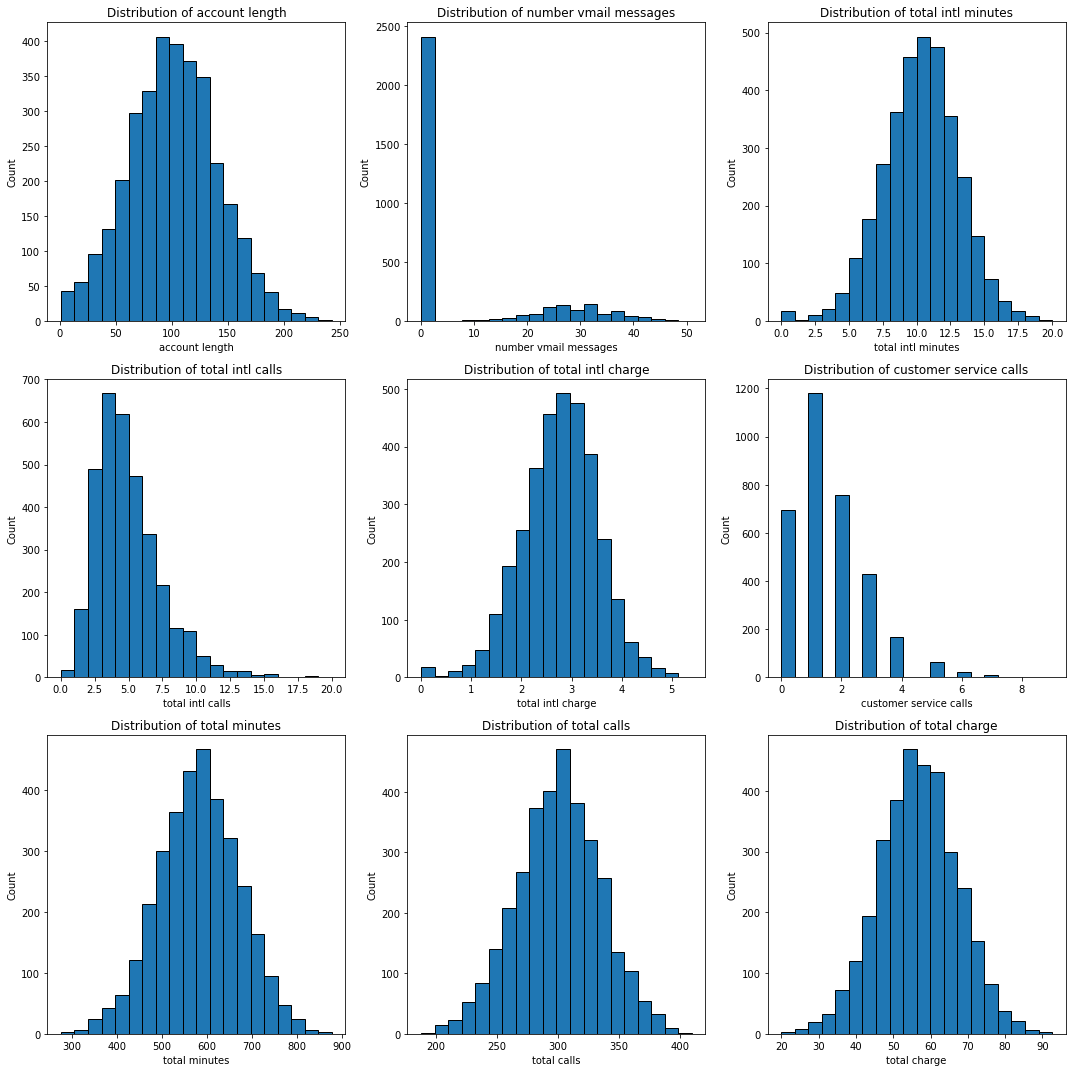

In [96]:
# Numerical features
numerical_features1 = df.select_dtypes(include=['int64', 'float']).columns.tolist()
# Calculate the number of rows and columns for subplots
num_plots = len(numerical_features1)
num_cols = 3  # Number of columns in the subplot grid
num_rows = num_plots // num_cols
if num_plots % num_cols != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to iterate over it
axes = axes.flatten()

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features1):
    axes[i].hist(df[feature], bins=20, edgecolor='black')
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Count")


# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Most of the variables are normally distributed, with the exception of 'total int calls' and 'customer service calls' which are positively skewed.

***Visualization of Customer Distribution and Churn Rates by Categorical Features***

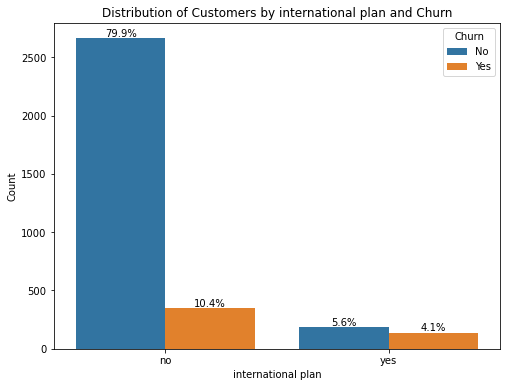

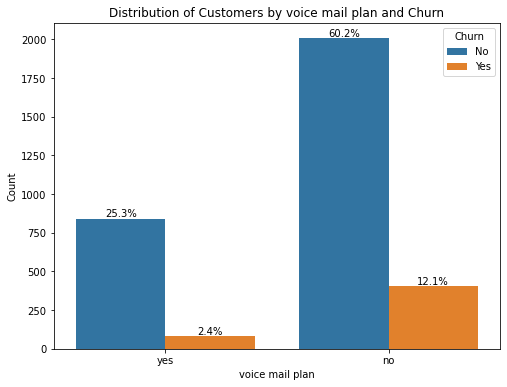

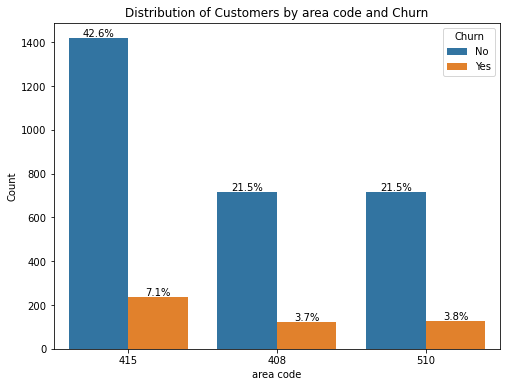

In [97]:
# visualize the distribution of customers across different categories of categorical features and analyze churn rates
# Categorical features
categorical_features = ["international plan", "voice mail plan", "area code"]

# Plotting bar charts
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=feature, hue="churn", data=df)
    plt.title(f"Distribution of Customers by {feature} and Churn")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title="Churn", labels=["No", "Yes"])

    # Add percentage labels
    total = len(df[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.show()


***Distribution of some numerical features and compared them for churned and non-churned customers***

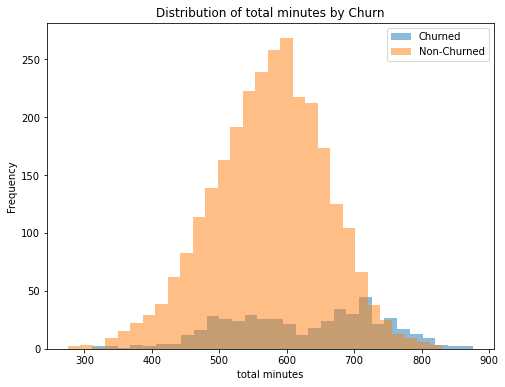

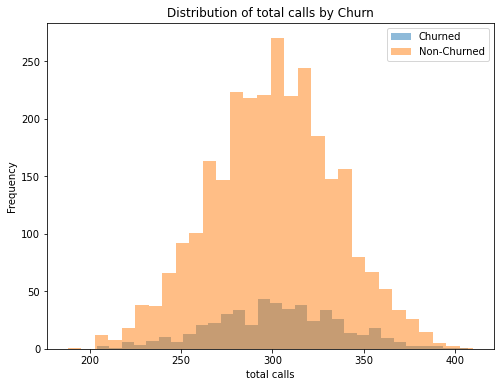

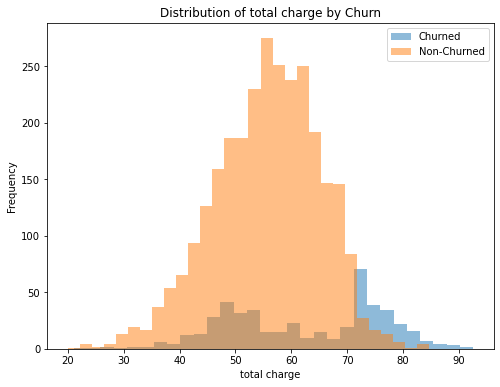

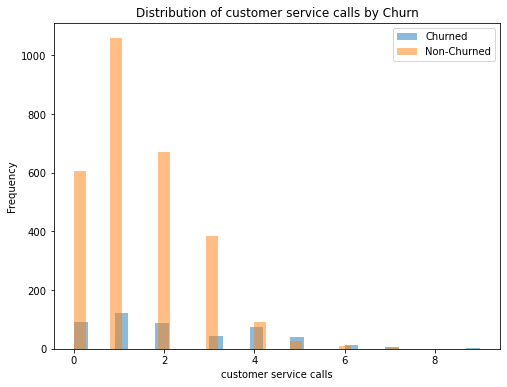

In [98]:
#analyze the distribution of numerical features and compare them for churned and non-churned customers using histograms

# Select the numerical features to analyze
numerical_features = ['total minutes', 'total calls', 'total charge', 'customer service calls']

# Plot histograms for churned and non-churned customers
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    
    # Histogram for churned customers
    plt.hist(df[df['churn'] == True][feature], bins=30, alpha=0.5, label='Churned')
    
    # Histogram for non-churned customers
    plt.hist(df[df['churn'] == False][feature], bins=30, alpha=0.5, label='Non-Churned')
    
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Churn')
    plt.legend()
    plt.show()


***Correlation Analysis and Heatmap***

I perform correlation analysis and generates a heatmap to visualize the correlations between numerical features and the churn variable.

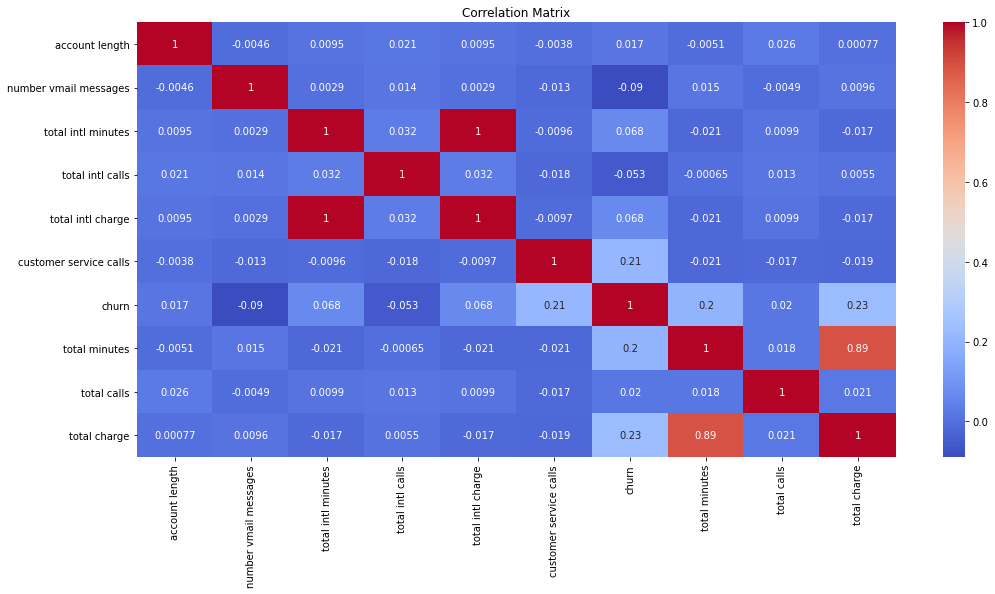

In [99]:
# correlation analysis and visualize the correlations between numerical features and the churn variable using a heatmap

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(17, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


***Converting area code column back to an integer***

In [100]:
df['area code'] = df['area code'].astype(int)


## MODEL SELECTION AND TRAINING

Begin by performing some preprocessing before starting with the modelling. Separated the target variable, remove unnecessary columns, and created dummy variables for categorical features. 
This prepares the data for further analysis and model training.

In [101]:
# Separate the target variable from the rest of the data.
churn = df['churn']


In [102]:
# Remove the unnecessary columns "churn", "phone number", and "state" from the dataframe.

df = df.drop("churn", axis=1)
df.drop('phone number', axis = 1, inplace=True)
df.drop('state', axis = 1, inplace=True)

In [103]:
# Create dummy variables for categorical columns
data = pd.get_dummies(df)
data.head()

,account length,area code,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,total minutes,total calls,total charge,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,10.0,3,2.70,1,707.2,300,72.86,1,0,0,1
1,107,415,26,13.7,3,3.70,1,611.5,329,55.54,1,0,0,1
2,137,415,0,12.2,5,3.29,0,527.2,328,59.00,1,0,1,0
3,84,408,0,6.6,7,1.78,2,558.2,248,65.02,0,1,1,0
4,75,415,0,10.1,3,2.73,3,501.9,356,49.36,0,1,1,0


 **Splitting the dataset into training and testing sets using the train_test_split function from scikit-learn**

In [104]:
# Splitting the dataset into training and testing sets
data_train, data_test, churn_train, churn_test = train_test_split(data, churn, test_size = 0.25, random_state=123)

Tree-based algorithms like random forests or decision trees are generally not sensitive to feature scaling. Since i look to focus on those two models, i will leave out scaling the dataset

In [105]:
# Using Standardcaler 
#scaler = StandardScaler()

# Fit the scaler on the training data
#scaler.fit(data_train)

# Transform the training and testing data
#data_train_scaled = scaler.transform(data_train)
#data_test_scaled = scaler.transform(data_test)


To address the imbalance situation with the dataset, i apply SMOTE

In [106]:
# Due to the imbalance in the distribution of churn and not churn data we use SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on the training data
data_train_resampled, churn_train_resampled = smote.fit_resample(data_train, churn_train)


In [42]:
# Replace original training data with resampled data
data_train = data_train_resampled
churn_train = churn_train_resampled
#data_test = data_test_scaled

**1. Decision Tree Classifier Model**

Instantiate the DecisionTreeClassifier class with the desired hyperparameters. In this case, we set the criterion as 'gini' and the maximum depth as 5.

In [43]:
# Instantiate DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state = 123) 


Fit the classifier to the training data. This step involves training the model on the input features (data_train) and the corresponding target variable (churn_train).

In [44]:
# Fit the classifier to the training data
tree_clf.fit(data_train, churn_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

***Feature importance***

Feature importance will help understand which features or variables had the most significant impact on the model's predictions.

In [45]:
# Feature importance
tree_clf.feature_importances_

array([0.00530264, 0.        , 0.        , 0.02314531, 0.0436394 ,
       0.0037434 , 0.15624891, 0.00223132, 0.        , 0.36196884,
       0.3015471 , 0.04185854, 0.        , 0.06031454])

In [46]:
column_names = data.columns.values
column_names

array(['account length', 'area code', 'number vmail messages',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'total minutes', 'total calls',
       'total charge', 'international plan_no', 'international plan_yes',
       'voice mail plan_no', 'voice mail plan_yes'], dtype=object)

In [47]:
# visualizing the feature importance
def plot_feature_importances(model, column_names):
    n_features = len(column_names)
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), column_names)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

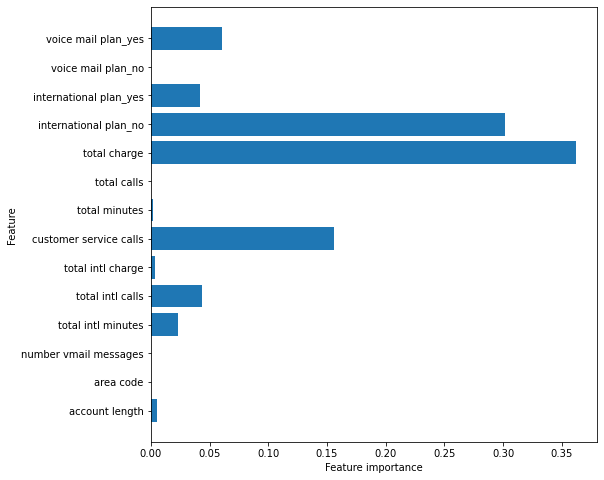

In [48]:
plot_feature_importances(tree_clf, column_names)

'total charge' has the highest bar, it suggests that this feature plays a significant role in determining whether a customer is likely to churn or not.
'total charge' could indicate that the total charges incurred by a customer are strongly correlated with their likelihood of churning. It implies that customers with higher total charges may be more likely to churn compared to those with lower total charges.

***Performing cross-validation***

In [49]:
# Perform cross-validation
cv_scores = cross_val_score(tree_clf, data_train, churn_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.90364277 0.91186839 0.93184489 0.92361927 0.92470588]
Mean CV Score: 0.9191362411004353


***Test the performance of the model***

In [50]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(churn_test, pred))
print(classification_report(churn_test, pred))

[[710  13]
 [ 18  93]]
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       723
        True       0.88      0.84      0.86       111

    accuracy                           0.96       834
   macro avg       0.93      0.91      0.92       834
weighted avg       0.96      0.96      0.96       834



I started with a basic decision tree classifier to predict customer churn. The decision tree model provided promising results with an accuracy of 96%, indicating its ability to correctly classify churned and non-churned customers. However, further evaluation revealed a relatively lower recall score of 84%, suggesting the need to improve the model's ability to capture more churned customers. Additionally, the precision score of 94.06% indicated a high accuracy in identifying churned customers, minimizing false positives. These initial results highlighted the potential of the decision tree model, but improvements are necessary to enhance its overall performance.

**2. Random Forest Classifier Model**

In [51]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=123)

# Fit the classifier on the training data
rf_classifier.fit(data_train, churn_train)



RandomForestClassifier(max_depth=5, random_state=123)

***Performing cross-validation***

In [52]:
# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, data, churn, cv=5, scoring='accuracy')

# Print the average accuracy across folds
print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.9531918725322024


***Feature Importance***

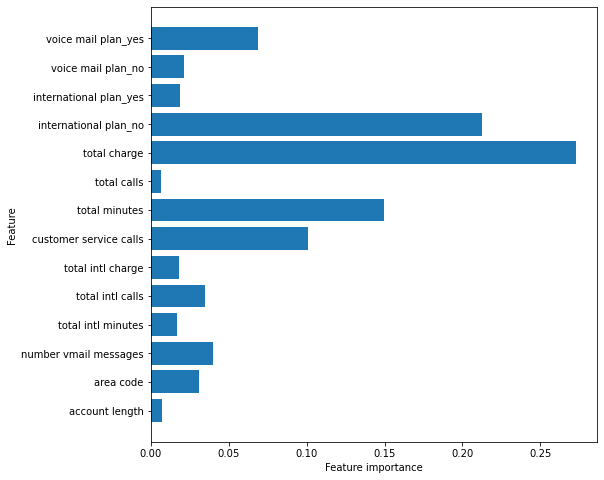

In [53]:
plot_feature_importances(rf_classifier, column_names)

***Test the performance of the model***

In [79]:
# Test set predictions
pred = rf_classifier.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(churn_test, pred))
print(classification_report(churn_test, pred))


[[715   8]
 [ 15  96]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       723
        True       0.92      0.86      0.89       111

    accuracy                           0.97       834
   macro avg       0.95      0.93      0.94       834
weighted avg       0.97      0.97      0.97       834



Moving on to the Random Forest model, I observe an accuracy of 97%, which is slightly higher than the Decision Tree model. The recall of 86% is also higher than the Decision Tree model, suggesting that the Random Forest model is a bit better in capturing more actual churn cases. The F1-score of 89% also indicates a trade-off between precision and recall. 

**3. Random Forest Model with tuned hyperparameters**

In [55]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [56]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state = 123)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(data_train, churn_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9647407202599018


In [69]:
# Create a new Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state = 123)

# Fit the classifier on the training data
best_rf_classifier.fit(data_train, churn_train)

# Test accuracy score
test_score = best_rf_classifier.score(data_test, churn_test)
print("Test Accuracy Score:", test_score)


Test Accuracy Score: 0.9700239808153477


***Feature Importance***

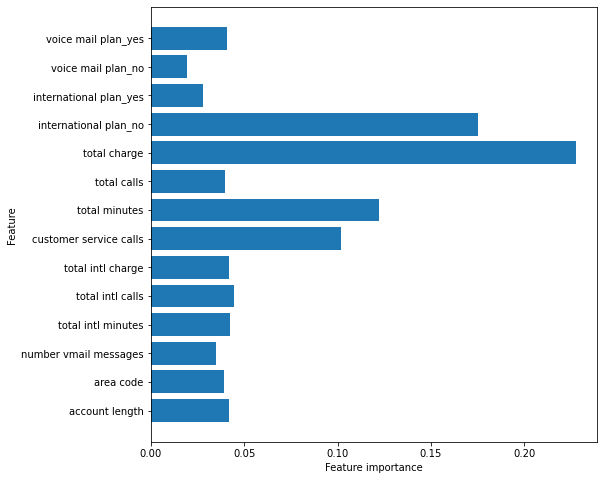

In [70]:
plot_feature_importances(best_rf_classifier, column_names)

***Performing cross-validation***

In [71]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf_classifier, data_train, churn_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.93537015 0.96239718 0.98237368 0.97179788 0.97176471]
Mean CV Score: 0.9647407202599018
Standard Deviation of CV Scores: 0.015988643236071562


***Test the performance of the model***

In [72]:
# Test set predictions
pred = best_rf_classifier.predict(data_test)

# Confusion matrix and classification report

print("Confusion Matrix:")
print(confusion_matrix(churn_test, pred))

print("\nClassification Report:")
print(classification_report(churn_test, pred))


Confusion Matrix:
[[713  10]
 [ 15  96]]

Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       723
        True       0.91      0.86      0.88       111

    accuracy                           0.97       834
   macro avg       0.94      0.93      0.93       834
weighted avg       0.97      0.97      0.97       834



As I refined the models, I introduced the Random Forest model with tuned hyperparameters. The results demonstrate an accuracy of 97%, which is the highest among the three models. The precision of 98% is also the highest, indicating a strong ability to accurately predict churn cases. The recall of 86.49% shows an improvement over the previous Random Forest model, indicating a better ability to capture actual churn cases. The F1-score of 91.87% suggests a good balance between precision and recall.

## MODEL EVALUATION

Defining a function to calculate the evaluation metrics of different models. The metrics being evaluated are accuracy, precision, recall, f1-score and AUC-ROC. However the most relevant evaluation metrics in this case is recall. These metric will help assess the model's ability to correctly identify churned customers. The function will also plot a confusion matrix

In [73]:
# Defining a function to calculate the evaluation metrics

def evaluate_model(y_true, y_pred_prob):
    # Convert probabilities to binary predictions
    y_pred = (y_pred_prob[:, 1] >= 0.5).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred_prob[:, 1])
    cm = confusion_matrix(y_true, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("AUC-ROC:", auc_roc)
    
    # Plot the confusion matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
    cm_display.plot(cmap='Blues')

    # Return the evaluation metrics as a dictionary
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "AUC-ROC": auc_roc,
        "Confusion Matrix": cm
    }
    
    return metrics


Defining a function to plot the ROC curve of the various models

In [74]:
# Function to plot the ROC curve

def plot_roc_curve(model, data, target):
    # Generate predicted probabilities
    y_pred_prob = model.predict_proba(data)[:, 1]
    
    # Calculate the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(target, y_pred_prob)
    
    # Calculate the AUC score
    auc_score = roc_auc_score(target, y_pred_prob)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


### 1. Evaluating the decision tree model

**Rationale of using Decision Tree model:**
The decision tree model was chosen because it is a simple and interpretable algorithm that can handle both categorical and numerical features. It can provide insights into the important factors that contribute to customer churn and make predictions based on those factors.

Accuracy: 0.9628297362110312
Precision: 0.8773584905660378
Recall: 0.8378378378378378
F1-score: 0.8571428571428571
AUC-ROC: 0.9212490498797554


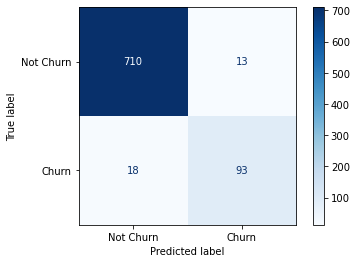

In [75]:
# Obtain predicted probabilities from the decision tree model
pred_prob = tree_clf.predict_proba(data_test)

# Evaluate the decision tree model
decision_tree_metrics = evaluate_model(churn_test, pred_prob)


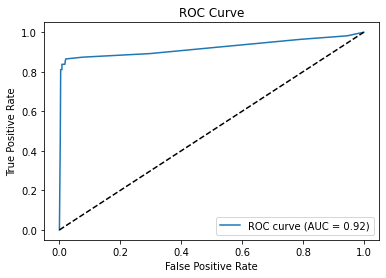

In [76]:
plot_roc_curve(tree_clf, data_test, churn_test)

**Results**.
* The *cross-validation* mean score of 0.919 suggests that the model exhibits consistent and reasonably good performance in predicting customer churn.
* Recall score of 0.838 indicating that the model can correctly identify approximately 83.8% of the customers who are likely to churn.


**Limitation:** Decision tree may not capture complex relationships between variables as effectively as other more advanced models

### 2. Evaluating the random forest model

**Rationale of using Random Forest model:**
Random forests are particularly suitable for classification tasks, such as predicting customer churn, as they can capture intricate relationships between features and effectively handle high-dimensional data.


Accuracy: 0.9784172661870504
Precision: 0.9696969696969697
Recall: 0.8648648648648649
F1-score: 0.9142857142857143
AUC-ROC: 0.9366814947727811


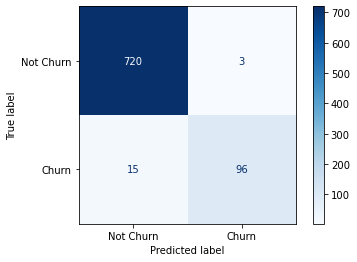

In [110]:
# Fit the classifier on the training data
rf_classifier.fit(data_train, churn_train)

# Predict probabilities on the test set
rf_pred_prob = rf_classifier.predict_proba(data_test)

# Evaluate the model
rf_metrics = evaluate_model(churn_test, rf_pred_prob)



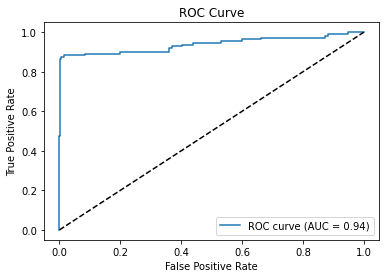

In [66]:
plot_roc_curve(rf_classifier, data_test, churn_test)

**Results**.
* The *cross-validation* accuracy of 0.953 indicating that it correctly classifies approximately 95.3% of the customer churn cases.
* Recall score of 0.865 indicating that the model can correctly identify approximately 86.5% of the customers who are likely to churn.


**Limitation:** Random forest models can pose computational challenges, particularly when dealing with large datasets that contain a high number of features. This can have implications for the model's time required for training.

### 3. Evaluating the random forest model with tuned hyperparameters

**Rationale of using Random Forest model with tuned hyperparameters:**
To improve the model's performance by optimizing the parameters for better accuracy and predictive power.


Accuracy: 0.9700239808153477
Precision: 0.9056603773584906
Recall: 0.8648648648648649
F1-score: 0.8847926267281107
AUC-ROC: 0.9346753392396546


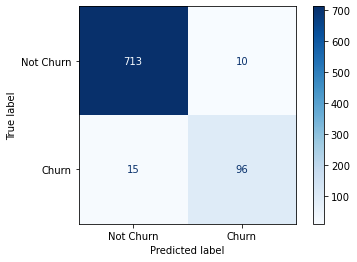

In [109]:
# Get predicted probabilities from the Random Forest model with tuned hyperparameters
rfh_pred_prob = best_rf_classifier.predict_proba(data_test)

# Evaluate the model
rfh_metrics = evaluate_model(churn_test, rfh_pred_prob)

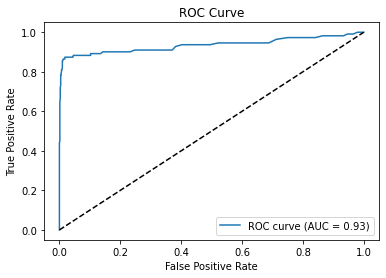

In [81]:
plot_roc_curve(best_rf_classifier, data_test, churn_test)

**Results**.
* The *cross-validation* accuracy of 0.9647 indicates that it correctly classifies approximately 96.47% of the customer churn cases. The model performs well on average across different subsets of the data. 
* Recall score of 0.8649 indicating that the model can correctly identify approximately 86.49% of the customers who are likely to churn.


**Limitation:** Performance of the model may vary depending on the specific dataset and the underlying patterns of customer churn.

## CONCLUSION

The improved performance of the final model demonstrates the iterative approach to modeling, where each model was evaluated and refined to achieve better results.

* Despite the Random Forest model and the Random Forest with tuned hyperparameters having nearly the same performance, the Random Forest model with tuned hyperparameters proves to be the best due to it's high cross-validation score between all the 3 models. This means it correctly classifies the highest amount of customer churn cases.
* Total charge tends to appear as the most important feature in all the 3 models. Perhaps, SyriaTel should consider on reducing their charges as a way of reducing customer churn


## RECOMMENDATION

SyriaTel can consider the random forest model with tuned hyperparameters as a strong candidate for predicting customer churn. It provides a good balance between accuracy and recall, indicating its ability to correctly identify customers who are likely to churn. However, stakeholders should also consider complementing the analysis with other techniques such as targeted marketing strategies, to further improve customer retention efforts.